## Proyecto despliegue de soluciones analíticas (DSA)
### 2025-15
### Grupo 28

## 1. Problema que abordan y contexto

La Clasificación única de Ocupaciones para Colombia (CUOC) es un listado de ocupaciones estandarizadas en donde se organizan y clasifican todos los empleos (cargos u oficios) que se desarrollan dentro del mercado laboral colombiano. Esta clasificación permite organizar los empleos en distintos niveles desde gerencial hasta obreros u otros. Esta clasificación es una herramienta que permite fortalecer la infraestructura estadística, la cual permite estandarizar la producción de estadísticas oficiales bajo los principios de calidad, coherencia y comparabilidad (DANE 2025). Por otro lado, según el artículo 2.2.6.2.6.9 del decreto 654 de 2021 se menciona que todos los usuarios que utilicen información relacionada con ocupaciones deberán implementar esta clasificación, con esto, se busca desarrollar una herramienta que permita mejorar el uso de la clasificación para el Servicio Público de Empleo (SPE), uno de los actores que usan información ocupacional. 

Con base en lo anterior se propone desarrollar una herramienta que permita conocer las 5 ocupaciones que mejor se ajustan al perfil laboral solicitado por el empleador, esto con el fin de que, desde el Servicio Público de Empleo, se puede llevar a cabo una implementación de la CUOC de forma dinámica entre los empleadores y los prestadores, quienes son los encargados de la intermediación laboral.

El desarrollo de esta herramienta parte de los registros de la Unidad Administrativa Especial del Servicio Público de Empleo (UAESPE) y la información de descripción de cada ocupación CUOC que se encuentra en la página del Departamento Administrativo Nacional de Estadística (DANE). Desde la UAESPE se obtiene la información del perfil laboral solicitado por los empleadores y desde el DANE se obtiene descripción de las ocupaciones CUOC, de tal forma que, a modo de insumo, se evalúe un modelo de recomendación en donde se pueda identificar cuáles son las ocupaciones más afines a estos perfiles. Una vez se estime el modelo se podrá desarrollar la disponibilización de la herramienta en la web para que los empleadores o prestadores hagan uso de este al ingresar el perfil laboral y se retornen las 5 ocupaciones más afines a ese perfil. Esta herramienta permita mejorar la captura de datos al momento de registro de la oferta de empleo por parte del empleador, estandarizando así el cargo solicitado por medio de las recomendaciones dadas por la herramienta, dando así un incentivo al uso e implementación de esta clasificación hacia los prestadores autorizados por el SPE y los registros administrativos de la UAESPE.

## 2. Pregunta de negocio y alcance del proyecto.

Dado el problema mencionado en el punto anterior, se busca dar respuesta a la siguiente pregunta de negocio ¿Cómo se podría dar una implementación y uso de la CUOC en el Servicio Público de Empleo? Ante esta pregunta se propone desarrollar una herramienta que, al interactuar con esta, se pueda conocer de forma fácil e inmediata las ocupaciones más afines al perfil solicitado por el empleador. Esta herramienta se desarrollará en 3 etapas: 1. Consulta, verificación y estandarización de datos; 2. Desarrollo, evaluación y ajuste del modelo de recomendación 3. Disponibilización de la herramienta y pruebas funcionales. Con respecto al tiempo, esta se planea desarrollar en 2 meses, teniendo como entregas una herramienta disponibilizada en la web, documento de metodología de construcción de la herramienta y los informes de avances o anomalías del proyecto. Se plantea esta herramienta como uso directo para los prestadores autorizados por el SPE, en donde al momento de registrar la oferta de empleo que solicita el empleador, estos podrán consultar, según el perfil laboral solicitado, los cargos ocupacionales CUOC que estén más relacionados con ese perfil. Una vez se adapte esta herramienta tendrá impactos en la evaluación de hojas de vida (al tener cargos ya definidos y estandarizados), y fortalecimiento de los registros administrativos de la UAESPE, los cuales sirven para toma de decisiones de política pública.

## 3. Descripción del conjunto de datos a emplear.

Los datos por usar fueron suministrados por la UAESPE, entidad la cual captura la información de ofertas laborales por medio de su sistema de información SISE (Sistema de Información del Servicio de Empleo). La data solicitada hace referencia a las ofertas de empleo que se registraron por medio de los prestadores que usan el SISE como plataforma para realizar el proceso de gestión de hoja de vida y ofertas de empleo. Los registros de ofertas de empleo que provienen del SISE presentan información como: título de la oferta de empleo, descripción de la oferta de empleo, nivel educativo solicitado, experiencia laboral solicitada, entre otros, Sin embargo, para el proyecto se pide la información de título de la oferta de empleo, descripción de la oferta de empleo, cargo equivalente 1 según el SISE, código del cargo equivalente 1 según la CUOC, cargo equivalente 2 según el SISE, código del cargo equivalente 2 según la CUOC y la fecha de creación.

- Titulo de la oferta de empleo: Breve denominación del puesto de trabajo que se desea suplir, campo de texto abierto.
- Descripción de la oferta de empleo: Información detallada del perfil de la vacante que se desea suplir. Incluye, entre otros aspectos, las funciones generales, las habilidades, conocimientos y destrezas requeridas, campo de texto abierto.
- Cargo equivalente 1 según el SISE: Principal cargo el cual el empleador quiere suplir el puesto de trabajo, esto con base en los cargos definidos por el SISE.
- Cargo equivalente 2 según el SISE: Principal secundario el cual el empleador quiere suplir el puesto de trabajo, esto con base en los cargos definidos por el SISE.
- Cargo equivalente 1 según la CUOC: Principal cargo el cual el empleador quiere suplir el puesto de trabajo, esto con base en la correlativa cargos SISE CUOC.
- Cargo equivalente 2 según la CUOC: Principal secundario el cual el empleador quiere suplir el puesto de trabajo, esto con base en la correlativa cargos SISE CUOC.

La Selección de estas variables se planteó para poder obtener la mayor información posible de los cargos a solicitar, sin embargo, para el ejercicio, son de carácter obligatorio la descripción de la oferta de empleo y el cargo equivalente 1 según la CUOC, dado que el insumo de la herramienta va a ser un texto y la salida un Código CUOC.

Adicionalmente se toma la información de la descripción del campo de la CUOC la cual se puede consultar en la página web del DANE (https://www.dane.gov.co/index.php/sistema-estadistico-nacional-sen/normas-y-estandares/nomenclaturas-y-clasificaciones/clasificaciones/clasificacion-unica-de-ocupaciones-para-colombia-cuoc?highlight=WyJjb2xvbWJpYSIsImNvbG9tYmlhbiJd) tomando los perfiles ocupacionales en formato excel. Esto complementará la base con la información del cargo CUOC para tener una especie de metadatos de la clasificación.

## 4. Exploración de datos

In [2]:
# cargar paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base= pd.read_csv('Ofertas_proyecto_U_DSA202515.csv', sep=';')
base.head(5)


,Titulo_vacante,Descripcion,Minimo_nivel_estudio,Cargo_CUOC_1,Cargo_SISE_1,Cargo_CUOC_2,Cargo_SISE_2,Fecha_creacion_proceso
0,APRENDIZ TECNICO O TECNOLOGO AUXILIAR ADMINIST...,Importante empresa busca para su equipo de tra...,Técnica Laboral,436000,Asistente administrativo,131000,Auxiliar administrativo,2021-11-18
1,APRENDIZ TECNICO O TECNOLOGO AUXILIAR ADMINIST...,Importante empresa busca para su equipo de tra...,Técnica Laboral,436000,Asistente administrativo,131000,Auxiliar administrativo,2021-12-03
2,PRACTICANTE TECNICO O TECNOLOGO AUXILIAR ADMIN...,Empresa en Latinoamerica en Servicios de Asist...,Técnica Laboral,436000,Asistente administrativo,131000,Auxiliar administrativo,2022-02-01
3,AGENTE CALL CENTER VENTAS,Gran Multinacional de telecomunicaciones requi...,Media(10-13),42220,Asesor call center,33220,Asesor comercial ventas no técnicas,2020-05-13
4,AGENTE CALL CENTER VENTAS,Gran Multinacional de telecomunicaciones requi...,Técnica Laboral,42220,Asesor call center,33220,Asesor comercial ventas no técnicas,2020-05-13


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857045 entries, 0 to 2857044
Data columns (total 8 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Titulo_vacante          object
 1   Descripcion             object
 2   Minimo_nivel_estudio    object
 3   Cargo_CUOC_1            int64 
 4   Cargo_SISE_1            object
 5   Cargo_CUOC_2            int64 
 6   Cargo_SISE_2            object
 7   Fecha_creacion_proceso  object
dtypes: int64(2), object(6)
memory usage: 174.4+ MB


In [5]:
cuoc= pd.read_excel('PerfilesOcupacionales-Excel-CUOC-2025.xlsx', sheet_name='Descripción', nrows=681,header=1)
cuoc.head(5)

,Código del Gran Grupo,Código de la Ocupación,Nombre de la Ocupación,Descripción de la Ocupación
0,0,1100,Oficiales de las Fuerzas Militares,"Planean, organizan, comandan y ejecutan la imp..."
1,0,2100,Suboficiales de las Fuerzas Militares,Supervisan y comandan las operaciones de las F...
2,0,3100,Otros miembros de las Fuerzas Militares,Actúan y apoyan unidades de combate en operaci...
3,1,11110,Directores formuladores y ejecutores de políti...,"Definen, formulan y orientan la política del p..."
4,1,11120,Directores del gobierno / Directoras del gobierno,Asesoran al gobierno sobre cuestiones normativ...


In [6]:
cuoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Código del Gran Grupo        680 non-null    int64 
 1   Código de la Ocupación       680 non-null    int64 
 2   Nombre de la Ocupación       680 non-null    object
 3   Descripción de la Ocupación  680 non-null    object
dtypes: int64(2), object(2)
memory usage: 21.4+ KB


### 4.1 Estandarización y arreglo de datos
Para la base final se busca tener un texto limpio con procesos de lematización, para el caso inicial se toma solo la descripción de la oferta de empleo y el cargo de la cuoc, si al correr el modelo se llegase a necesitar más campos, se añadiran los que se tienen en la base solicitada.

In [4]:
# definir funciones de limpieza
def limpiar_texto(texto):
    if pd.isnull(texto):
        return texto
    return (texto
            .replace('\t', '')
            .replace('\n', '')
            .replace('\r', '')
            .replace('Ã¡', 'á')
            .replace('Ã©', 'é')
            .replace('Ã­', 'í')
            .replace('Ã³', 'ó')
            .replace('Ãº', 'ú')
            .replace('Ã±', 'ñ')
            .replace('Ã ', 'Á')
            .replace('Ã‰', 'É')
            .replace('Â¿', '¿')
            .replace('Â¡', '¡')
            .replace('â€¢', '')
            .replace('Â·', '')
            .replace('Ã?', 'Á')
            .replace('Ã','Á')
            .replace('Ã‰','É')
            .replace('Ã','Í')
            .replace('Â¡Ãš','Ú')
            .replace('Ãš','Ú')
            .replace('Ã','Ñ')
            .replace('â€¢', '')
            .replace('Â·', '')
           )

# Función para reemplazar palabras con problemas de codificación
def palabrasTexto(texto):
    replacements = {
             'Distribuci\\?n': 'Distribución',
         'distribuci\\?n': 'distribución',
        'Producci\\?n': 'Producción',
        'producci\\?n': 'producción',
        'PRODUCCI\\?N': 'PRODUCCIÓN',
        'Dise\\?ador': 'Diseñador',
        'Gr\\?fico': 'Gráfico',
        'Telef\\?nica': 'Telefónica',
        'T\\?cnico': 'Técnico',
        'Tècnico': 'Técnico',
        'Tecn\\?logo': 'Tecnólogo',
        'Tecnol\\?gico': 'Tecnológico',
        'N\\?mina': 'Nómina',
        'BOGOT\\?': 'BOGOTÁ',
        'Bogot\\?': 'Bogotá',
        'Ch\\?a': 'Chía',
        'Log\\?stico': 'Logístico',
        'LOG\\?STICO': 'LOGÍSTICO',
        'Biling\\?e': 'Bilingue',
        'Bilingüe': 'Bilingue',
        'ü': 'u',
        'Aerol\\?nea': 'Aerolínea',
        'Cafeter\\?a': 'Cafetería',
        'Ferreter\\?a': 'Ferretería',
        'Met\\?licos': 'Metálicos',
        'Construcci\\?n': 'Construcción',
        'FRE\\?DO': 'FREÍDO',
        'Gesti\\?n': 'Gestión',
        'Mec\\?nico': 'Mecánico',
        'configuraci\\?n': 'configuración',
        'Cr\\?dito': 'Crédito',
        'C\\?cuta': 'Cúcuta',
        'Fabricaci\\?n': 'Fabricación',
        'VINCULACI\\?N': 'VINCULACIÓN',
        'COMPENSACI\\?N': 'COMPENSACIÓN',
        'TECNOLOG\\?A': 'TECNOLOGÍA',
        'Tem\\?tico': 'Temático',
        'topograf\\?a': 'topografía',
        'ALMAC\\?N': 'ALMACÉN',
        'Almac\\?n': 'Almacén',
        'contrataci\\?n': 'contratación',
        'Contrataci\\?n': 'Contratación',
        'env\\?os': 'envíos',
        'Env\\?os': 'Envíos',
        'ingl\\?s': 'inglés',
        'Electr\\?nica': 'Electrónica',
        'electr\\?nica': 'electrónica',
        'refrigeraci\\?n': 'refrigeración',
        'Refrigeraci\\?n': 'Refrigeración',
        'panader\\?a': 'panadería',
        'Pasteler\\?a': 'Pastelería',
        'Post\\?late': 'Postúlate',
        'campa\\?a': 'campaña',
        'Campa\\?a': 'Campaña',
        'Espa\\?ol': 'Español',
        'Ferreter\\?a': 'Ferretería',
        'Met\\?licos': 'Metálicos',
        'met\\?lica': 'metálica',
        'mec\\?nica': 'mecánica',
        'ferreter\\?a': 'ferretería',
        'Construcci\\?n': 'Construcción',
        'pl\\?stico': 'plástico',
        'inyecci\\?n': 'inyección',
        'Atenci\\?n': 'Atención',
        'Ibagu\\?': 'Ibagué',
        'dom\\?sticos': 'domésticos',
        'Furg\\?n': 'Furgón',
        'Collar\\?n': 'Collarín',
        'Direcci\\?n': 'Dirección',
        'corrosi\\?n': 'corrosión',
        'h\\?brido': 'híbrido',
        'Aerol\\?nea': 'Aerolínea',
        '&': ' and ',
        'electroest\\?tico': 'electroestático',
        'af\\?n': 'afín'
    }
    for old, new in replacements.items():
        texto = texto.replace(old, new)
    return texto

# Funciones de limpieza adicionales
def lowerTexto(texto):
    if pd.isnull(texto):
        return texto
    return texto.lower()

def nodeseadosTexto(texto):
    if pd.isnull(texto):
        return texto
    return re.sub(r'[^a-z0-9 áéíóúñ]', ' ', texto)

def trimTexto(texto):
    if pd.isnull(texto):
        return texto
    return re.sub(r'\s+', ' ', texto).strip()

# Función para eliminar espacios entre números
def eliminar_espacios_numeros(texto):
    if pd.isnull(texto):
        return texto
    return re.sub(r'([0-9]+) ([0-9]+)', r'\1\2', texto)

def quitar_numeros(texto):
    if pd.isnull(texto):
        return texto
    return re.sub(r'\d+', '', texto)

# Función para quitar espacios iniciales
def quitar_espacios_inicio(texto):
    if pd.isnull(texto):
        return texto
    return re.sub(r'^ +', '', texto)



# Función para eliminar puntos, parentesis y demás
def quitar_puntos_otros(texto):
    if pd.isnull(texto):
        return texto
    return (texto
            .replace('.', '')
            .replace(',', '')
            .replace(';', '')
            .replace('_', '')
            .replace('-', '')
            .replace('/', '')
            .replace("\\", '')
            .replace(')', '')
            .replace('(', '')
            .replace(':', '')
            .replace("'", '')
            .replace('?', '')
            .replace('¿', '')
            .replace('•', '')
            .replace('=', '')
            .replace('>', '')
            .replace('<', '')
            .replace('&', '')
            .replace('%', '')
            .replace('$', '')
            .replace('#', '')
            .replace('!', '')
            .replace('¡', '')
            .replace('+', '')
            .replace('@', '')
            .replace('nan', '')
           )


stop_words=["algún","alguna","algunas","alguno","algunos",
            "ambos","ampleamos","ante","antes","aquel",
            "aquellas","aquellos","aqui","arriba","atras",
            "bajo","bastante","bien","cada","cierta",
            "ciertas","cierto","ciertos","como","con",
            "conseguimos","conseguir","consigo","consigue",
            "consiguen","consigues","cual","cuando","dentro",
            "desde","donde","dos","el","ellas","ellos",
            "empleais","emplean","emplear","empleas","empleo",
            "en","encima","entonces","entre","era","eramos",
            "eran","eras","eres","es","esta","estaba",
            "estado","estais","estamos","estan","estoy",
            "fin","fue","fueron","fui","fuimos","gueno",
            "ha","hace","haceis","hacemos","hacen","hacer",
            "haces","hago","incluso","intenta","intentais",
            "intentamos","intentan","intentar","intentas",
            "intento","ir","la","largo","las","lo","los",
            "mientras","mio","modo","muchos","muy","nos",
            "nosotros","otro","para","pero","podeis","podemos",
            "poder","podria","podriais","podriamos","podrian",
            "podrias","por","porqué","porque","primero",
            "puede","pueden","puedo","quien","sabe","sabeis",
            "sabemos","saben","saber","sabes","ser","si",
            "siendo","sin","sobre","sois","solamente","solo",
            "somos","soy","su","sus","también","teneis",
            "tenemos","tener","tengo","tiempo","tiene",
            "tienen","todo","trabaja","trabajais","trabajamos",
            "trabajan","trabajar","trabajas","trabajo","tras",
            "tuyo","ultimo","un","una","unas","uno","unos",
            "usa","usais","usamos","usan","usar","usas",
            "uso","va","vais","valor","vamos","van","vaya",
            "verdad","verdadera","VERDADERO","vosotras","vosotros",
            "voy","yo","él","ésta","éstas","éste","éstos",
            "última","últimas","último","últimos","a","añadió",
            "aún","actualmente","adelante","además","afirmó",
            "agregó","ahí","ahora","al","algo","alrededor",
            "anterior","apenas","aproximadamente","aquí","así",
            "aseguró","aunque","ayer","buen","buena","buenas",
            "bueno","buenos","cómo","casi","cerca","cinco",
            "comentó","conocer","consideró","considera","contra",
            "cosas","creo","cuales","cualquier","cuanto","cuatro",
            "cuenta","da","dado","dan","dar","de","debe",
            "deben","debido","decir","dejó","del","demás",
            "después","dice","dicen","dicho","dieron","diferente",
            "diferentes","dijeron","dijo","dio","durante","e",
            "ejemplo","ella","ello","embargo","encuentra",
            "esa","esas","ese","eso","esos","está","están",
            "estaban","estar","estará","estas","este","esto",
            "estos","estuvo","ex","existe","existen","explicó",
            "expresó","fuera","gran","grandes","había","habían",
            "haber","habrá","hacerlo","hacia","haciendo","han",
            "hasta","hay","haya","he","hecho","hemos","hicieron",
            "hizo","hoy","hubo","igual","indicó","informó",
            "junto","lado","le","les","llegó","lleva","llevar",
            "luego","lugar","más","manera","manifestó","mayor",
            "me","mediante","mejor","mencionó","menos","mi",
            "misma","mismas","mismo","mismos","momento","mucha",
            "muchas","mucho","nada","nadie","ni","ningún",
            "ninguna","ningunas","ninguno","ningunos","no",
            "nosotras","nuestra","nuestras","nuestro","nuestros",
            "nueva","nuevas","nuevo","nuevos","nunca","o",
            "ocho","otra","otras","otros","parece","parte",
            "partir","pasada","pasado","pesar","poca","pocas",
            "poco","pocos","podrá","podrán","podría","podrían",
            "poner","posible","próximo","próximos","primer",
            "primera","primeros","principalmente","propia","propias",
            "propio","propios","pudo","pueda","pues","qué",
            "que","quedó","queremos","quién","quienes","quiere",
            "realizó","realizado","realizar","respecto","sí",
            "sólo","se","señaló","sea","sean","según",
            "segunda","segundo","seis","será","serán","sería",
            "sido","siempre","siete","sigue","siguiente","sino",
            "sola","solas","solos","son","tal","tampoco",
            "tan","tanto","tenía","tendrá","tendrán","tenga",
            "tenido","tercera","toda","todas","todavía","todos",
            "total","trata","través","tres","tuvo","usted",
            "varias","varios","veces","ver","vez","y","ya"
]

def eliminar_stop_words(texto):
    words = texto.split() 
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word) 
    texto=' '.join([token for token in filtered_words])
    return texto

# Funciones adicionales
def lower_texto(texto):
    if pd.isnull(texto):
        return texto
    return texto.lower()

def limpiar_completo(texto):
    if pd.isnull(texto):
        return texto
    texto = limpiar_texto(texto)  # Aplicar limpieza de caracteres extraños
    texto = palabrasTexto(texto)  # Reemplazar palabras con problemas de codificación
    texto = lowerTexto(texto)     # Convertir a minúsculas
    texto = quitar_puntos_otros(texto)  # quitar puntuaciones y otros caracteres
    texto = eliminar_stop_words(texto)        # Eliminar palabras no deseadas
    texto = trimTexto(texto)      # Eliminar espacios adicionales
    texto = eliminar_espacios_numeros(texto)  # Eliminar espacios entre números
    texto = quitar_numeros(texto)  # Eliminar números
    texto = quitar_espacios_inicio(texto)     # Eliminar espacios iniciales
    return texto

In [ ]:
import re
#seleccion de variables y muestra
base1=base.loc[0::250,['Descripcion','Cargo_CUOC_1']]
# limpiar texto
base1['Descripcion'] = base1['Descripcion'].apply(limpiar_completo)

#conteo de numero de palabras para quedarnos con las descirpciones que tienen más de 3 palabras
num_palabras=[]
for t in base1.index.to_list():
    #print('registro:',t)
    palabras = str(base1['Descripcion'][t]).split()
    #n_palabras =base1['Descripcion'][t].fillna('').str.split().str.len()
    num_palabras.append(len(palabras))

base1['Numero_palabras']=num_palabras
Palabras=len(base1[base1['Numero_palabras']<=2])
print('Hay: ', Palabras, 'registros menos de 3 palabras, lo que representa un: ', round((Palabras/len(base1))*100,2), '% del total de registros, los cuales se eliminan')

# estandarizar codigo cuoc dejando los primeros 5 digitos
base1['Cargo_CUOC_1'] = base1['Cargo_CUOC_1'].astype(str).str[:5] #quedarnos con los primeros 5 digitos
#mirar que todos los codigos CUOC tengan 5 digitos
base1['Length_cuoc'] = base1['Cargo_CUOC_1'].str.len().fillna(0)
menoresa4=len(base1[base1['Length_cuoc'] <= 3])
print('Hay: ', menoresa4, 'registros con longitud de código CUOC menor a 4, lo que representa un: ', round((menoresa4/len(base1))*100,2), '% del total de registros, los cuales se eliminan')


#eliminar valores nulos
valores_nulos=base1['Descripcion'].isna().sum()
print('Hay: ', valores_nulos, 'registros nulos en la variable descripción lo que representa un: ', round((valores_nulos/len(base1))*100,2), '% del total de registros')


#verificar duplicados por Descripción y CUOC
duplicados=base1.duplicated(subset=['Descripcion', 'Cargo_CUOC_1']).sum()
print('Hay: ', duplicados, 'registros duplicados lo que representa un: ', round((duplicados/len(base1))*100,2), '% del total de registros')


base2 = base1[base1['Numero_palabras'] >= 3] #quitar registros con menos de 3 palabras
base2 = base2[base2['Length_cuoc'] >= 4] #quitar registros con codigos cuoc diferentes a 5 o 4 (los 4 se complementa con un cero a la izquierda)
base2['Cargo_CUOC_1'] = [str(num).zfill(5) for num in base2['Cargo_CUOC_1']]
base2 = base2.dropna(subset=['Descripcion']) #quitar valores nulos en descripción
base2 = base2.drop_duplicates(subset=['Descripcion', 'Cargo_CUOC_1'])  #quitar duplicados por descripción cuoc
print('La base resultante presenta un total de:', len(base2), 'registros y la base inicial presenta un total de',len(base1),'registros, por lo que se eliminan', len(base1)-len(base2), 'registros, los cuales representan un',round(((len(base1)-len(base2))/len(base1))*100,2),'% del total de registros iniciales.')

base2=base2[['Descripcion','Cargo_CUOC_1']]
base2=base2.rename(columns={'Cargo_CUOC_1':'CUOC','Descripcion':'Descripcion_oferta'})
base2

Hay:  11 registros menos de 3 palabras, lo que representa un:  0.1 % del total de registros, los cuales se eliminan
Hay:  541 registros con longitud de código CUOC menor a 4, lo que representa un:  4.73 % del total de registros, los cuales se eliminan
Hay:  4 registros nulos en la variable descripción lo que representa un:  0.03 % del total de registros
Hay:  642 registros duplicados lo que representa un:  5.62 % del total de registros
La base resultante presenta un total de: 10235 registros y la base inicial presenta un total de 11429 registros, por lo que se eliminan 1194 registros, los cuales representan un 10.45 % del total de registros iniciales.


,Descripcion_oferta,CUOC
0,importante empresa busca equipo aprendiz tecni...,43600
250,requiere cargo ayudante cocina rochelaeducacio...,94120
750,importante compañia requiere asesores comercia...,33220
1000,requiere persona proactiva dinamica actitud se...,35900
1750,bachiller experiencia ejecutar labores aseo li...,37200
...,...,...
2855500,empresa expendio comidas preparadas cafeterias...,94120
2856000,importante empresa sector requiere equipo auxi...,94120
2856250,importante empresa region requiere equipo anal...,26310
2856500,busqueda personal experiencia restaurantes uni...,94120


In [10]:
#seleccion de variables y muestra
cuoc1=cuoc[['Código de la Ocupación','Descripción de la Ocupación']]
cuoc1=cuoc1.rename(columns={'Código de la Ocupación':'CUOC','Descripción de la Ocupación':'Descripcion_CUOC'})

cuoc1['CUOC'] = [str(num).zfill(5) for num in cuoc1['CUOC']]

# limpiar texto
cuoc1['Descripcion_CUOC'] = cuoc1['Descripcion_CUOC'].apply(limpiar_completo)

cuoc1

,CUOC,Descripcion_CUOC
0,01100,planean organizan comandan ejecutan implementa...
1,02100,supervisan comandan operaciones fuerzas milita...
2,03100,actúan apoyan unidades combate operaciones fue...
3,11110,definen formulan orientan política público niv...
4,11120,asesoran gobierno cuestiones normativas superv...
...,...,...
675,96250,reabastecen máquinas venta automática artículo...
676,96260,observan anotan registran verifican datos rela...
677,96291,ayudan clientes encontrar asiento ubicación ev...
678,96292,ayudan trabajadores labores sencillas rutinari...


In [11]:
print(f"Duplicados en ofertas: {base2['CUOC'].duplicated().sum()}")
print(f"Duplicados en cuoc: {cuoc1['CUOC'].duplicated().sum()}")
base_final=pd.merge(base2,cuoc1,on='CUOC',how='outer')
base_final

Duplicados en ofertas: 9782
Duplicados en cuoc: 0


,Descripcion_oferta,CUOC,Descripcion_CUOC
0,oficial experiencia obra civil conocimiento in...,01100,planean organizan comandan ejecutan implementa...
1,NaN,02100,supervisan comandan operaciones fuerzas milita...
2,NaN,03100,actúan apoyan unidades combate operaciones fue...
3,funciones coordinar gestionar funcionamiento e...,11100,NaN
4,gerenciar relaciones clientes zona apoyando cr...,11100,NaN
...,...,...,...
10510,NaN,96292,ayudan trabajadores labores sencillas rutinari...
10511,cargo auxiliar parqueadero funciones ayudar pe...,96299,ocupación abarca ocupaciones elementales clasi...
10512,bachiller experiencia salario smlv contrato ob...,96299,ocupación abarca ocupaciones elementales clasi...
10513,bachiller meses experiencia trabajos operativ...,96299,ocupación abarca ocupaciones elementales clasi...


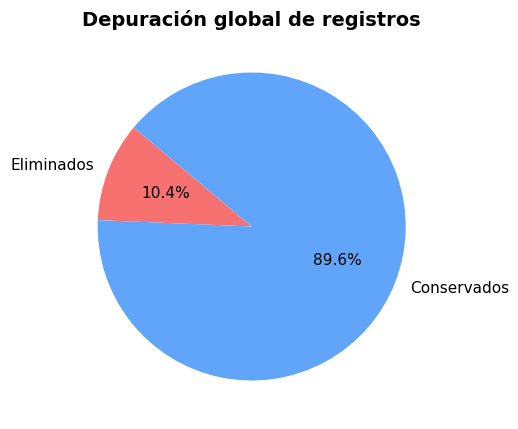

In [14]:
colors = ['#F87171', '#60A5FA']  # 
plt.figure(figsize=(5,5))
plt.pie(
    [1194, 10235],
    labels=['Eliminados', 'Conservados'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11, 'color': 'black'}
)
plt.title('Depuración global de registros', fontsize=14, fontweight='bold')
plt.show()



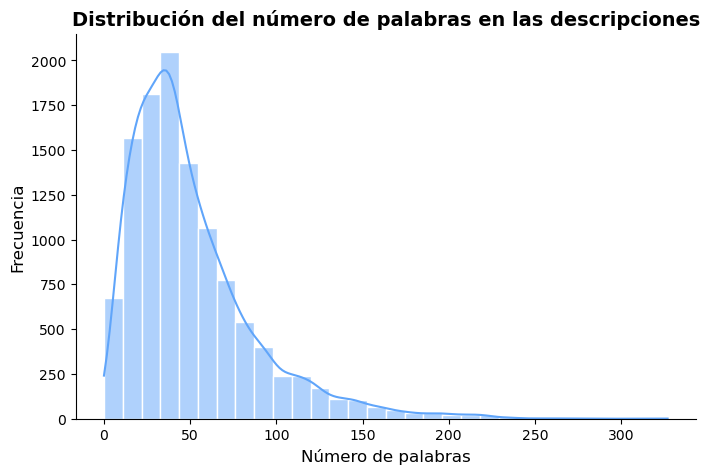

In [15]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(base1['Numero_palabras'], bins=30, kde=True, color='#60A5FA', edgecolor='white')
plt.title('Distribución del número de palabras en las descripciones', fontsize=14, fontweight='bold')
plt.xlabel('Número de palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
sns.despine()
plt.show()



## Conclusión general sobre la limpieza, estandarización y depuración de datos

La ejecución del proceso de limpieza y estandarización permitió transformar una base de datos inicial con inconsistencias textuales y de codificación en un **conjunto depurado, homogéneo y semánticamente coherente**, apto para la creación de modelos de recomendación basados en similitud entre descripciones de ofertas laborales y ocupaciones CUOC.

### Resultados principales

- Se eliminaron **1.194 registros (10.45 % del total inicial)**, principalmente por descripciones vacías, longitud insuficiente o códigos CUOC incompletos.  
- Se detectó y eliminó un **5.62 % de duplicados**, mejorando la representatividad y reduciendo el sesgo.  
- La base final consolidó **10.235 registros válidos**, con descripciones limpias, estandarizadas y códigos CUOC formateados a cinco dígitos.  
- La **base CUOC oficial (680 registros)** se mantuvo libre de duplicados y fue sometida al mismo proceso de normalización, garantizando la coherencia en el emparejamiento posterior.

### Relevancia de la función `limpiar_completo()`

La función `limpiar_completo()` actúa como un **pipeline integral de preprocesamiento textual**, combinando operaciones de corrección de caracteres, reemplazo de palabras mal codificadas, eliminación de ruido, normalización a minúsculas y filtrado de *stopwords* en español.  
Este enfoque mejora la calidad léxica del corpus y asegura que los textos puedan ser **comparados y vectorizados bajo las mismas condiciones lingüísticas**, un paso esencial para los modelos de similitud y recomendación ocupacional.

### ¿Que observamos según los graficos?

Los gráficos generados permiten evaluar el efecto de la depuración:

- **Distribución del número de palabras:**  
  La mayoría de las ofertas se concentran entre **20 y 60 palabras**, evidenciando un corpus con descripciones de tamaño medio y contenido suficiente para análisis semánticos.  
  Esto valida la decisión de eliminar textos con menos de tres palabras.

- **Depuración global:**  
  El gráfico circular refleja que, pese a la eliminación del 10.4 % de registros, se mantiene un **89.6 % de información útil**, demostrando la efectividad del proceso de limpieza sin comprometer la cobertura del conjunto de datos.

### 4.2 Exploración descriptiva de los datos

In [18]:
#pip install wordcloud

In [19]:
from wordcloud import WordCloud
from collections import Counter
import re

   • Total de filas: 10515
   • Filas con texto: 10515
   • Filas vacías/NaN: 0
   • Porcentaje con texto: 100.0%
   • Total de palabras: 543,928
   • Total de caracteres: 5,258,030
   • Palabras únicas: 46,516
   • Longitud promedio por texto: 0.6 palabras
   • Longitud máxima por texto: 1 palabras
   • Longitud mínima por texto: 1 palabras


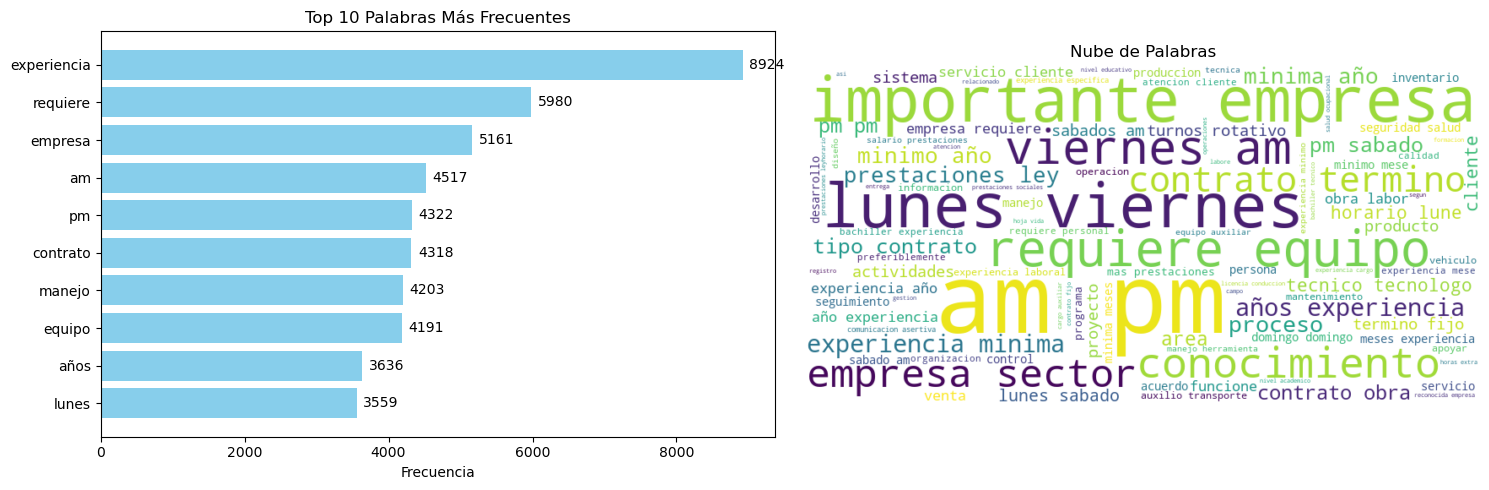

In [20]:
total_filas = len(base_final)
filas_con_texto = len(base_final['Descripcion_oferta'])
filas_vacias = total_filas - filas_con_texto
    
print(f"   • Total de filas: {total_filas}")
print(f"   • Filas con texto: {filas_con_texto}")
print(f"   • Filas vacías/NaN: {filas_vacias}")
print(f"   • Porcentaje con texto: {(filas_con_texto/total_filas)*100:.1f}%")


texto_completo_o = ' '.join(base_final['Descripcion_oferta'].fillna('').astype(str))
palabras_o = texto_completo_o.split()

print(f"   • Total de palabras: {len(palabras_o):,}")
print(f"   • Total de caracteres: {len(texto_completo_o):,}")
print(f"   • Palabras únicas: {len(set(palabras_o)):,}")
print(f"   • Longitud promedio por texto: {np.mean([len(str(t).split()) for t in str(base_final['Descripcion_oferta'])]):.1f} palabras")
print(f"   • Longitud máxima por texto: {np.max([len(str(t).split()) for t in str(base_final['Descripcion_oferta'])])} palabras")
print(f"   • Longitud mínima por texto: {np.min([len(str(t).split()) for t in str(base_final['Descripcion_oferta']) if str(t).strip() != ''])} palabras")


contador = Counter(palabras_o)
top_10 = contador.most_common(10)
    
#for i, (palabra, frecuencia) in enumerate(top_10, 1):
#    print(f"   {i:2d}. {palabra:<15} {frecuencia:>5} veces")

plt.figure(figsize=(15, 5))
    
# Subplot 1: Top 10 palabras
plt.subplot(1, 2, 1)
palabras_top = [p[0] for p in top_10]
frecuencias_top = [p[1] for p in top_10]
    
plt.barh(palabras_top, frecuencias_top, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 10 Palabras Más Frecuentes')
plt.gca().invert_yaxis()
# Añadir los números en las barras
for i, v in enumerate(frecuencias_top):
    plt.text(v + max(frecuencias_top)*0.01, i, str(v), va='center')




plt.subplot(1, 2, 2)
# Crear texto para la nube de palabras    
if texto_completo_o.strip():
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        colormap='viridis',
        stopwords=stop_words
    ).generate(texto_completo_o)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras')
else:
    plt.text(0.5, 0.5, 'No hay suficientes palabras\npara generar la nube', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

El análisis de texto revela que la base de datos no contiene registros vacíos y está bien estructurada, con más de 540 mil palabras. Las palabras más frecuentes como experiencia, requiere, empresa, contrato, equipo, lunes y viernes indican que las ofertas laborales analizadas se centran en los requisitos del cargo, la experiencia previa y las condiciones laborales, incluyendo horarios y días de trabajo. La nube de palabras refuerza esta tendencia al resaltar conceptos relacionados con el entorno empresarial y las jornadas laborales. En conjunto, los resultados evidencian que las descripciones de oferta enfatizan la formalidad contractual, la disponibilidad horaria y la necesidad de experiencia, elementos clave en los procesos de selección laboral.

## 5. Diseño prototipo maqueta

Con base en la funcionalidad de la herramienta, se propone inicialmente el siguiente prototipo en donde consta de unos campos de ingreso: descripción del perfil laboral a solicitar por el empleador y nivel educativo solicitado; y unos campos de salida que son los 5 cargos más relevantes a ese perfil laboral solicitado.  

Esta herramienta permite dar respuesta a la pregunta de negocio "*¿Cómo se podría dar una implementación y uso de la CUOC en el Servicio Público de Empleo?*",  ya que le permite a los empleadores conocer de manera sencilla y ágil el top 5 de los cargos dentro la CUOC que más se acomodan al perfil solictado, logrando de esta manera que se use esta clasificación de ocupaciones dentro del Servicio Público de Empleo.

![Logo de ejemplo](Mockup.PNG)

## 6. Reporte de trabajo de equipo

Con base en el cronograma y etapas del proyecto cada uno de los integrantes se les asignará las siguientes actividades:

- Verny Mendoza: Planteamiento del problema, captura de datos, preprocesamiento y estandarización inicial, propuesta de modelo de recomendación
- David Castiblanco: Exploración de datos, propuesta de modelo de recomendación
- Tatiana Cardenas: Diseño del prototipo de la maqueta (mockup), propuesta de modelo de recomendación
- Homan Zarta: disponibilización de la herramienta en la web, propuesta de modelo de recomendación

Estas actividades pueden desarrollarse en conjunto o de forma individual, de tal forma que se puedan apoyar cada uno de los integrantes.


## Bibliografía
- Departamento Administrativo Nacional de Estadística (DANE). (2025). *Clasificación Única de Ocupaciones para Colombia - CUOC*. Gobierno de Colombia. https://www.dane.gov.co/files/sen/nomenclatura/cuoc/documento-clasificacion-unica-ocupaciones-colombia-CUOC-2025.pdf